# Know Your Client (KYC) Survey: Risk Tolerance & ESG Preferences Assessment
**Interactive Python Demonstration for AI-Integrated Sustainable Finance**

Key Features:
1. Comprehensive 20-Question Survey:
    - Risk Tolerance (7 questions): Investment comfort, time horizon, loss tolerance
    - ESG Preferences (11 questions): Environmental, Social, Governance priorities
    - Demographics (2 questions): Age and income stability
    - Mix of Yes/No and 1-5 scale questions for simplicity

2. Decision Tree Analysis:
    - Simple Binary Trees: Easy-to-understand classification rules
    - Complex Multi-branch Trees: More realistic decision making
    - Visual rule display showing how classifications work
    - Both risk tolerance and ESG preference trees

3. Interactive Plotly Visualizations:
    - Main Dashboard: 9-panel comprehensive analysis
    - Individual Question Comparisons: Your responses vs population
    - Risk vs ESG scatter plots with your position highlighted
    - Component breakdowns for E, S, G scores separately

4. Realistic Population Simulation:
    - 500 simulated clients (adjustable)
    - Age-correlated responses (younger = higher risk/ESG)
    - Realistic demographic patterns
    - Statistical distributions matching real investor behavior

5. Comprehensive Profiling:
    - Risk Categories: Conservative/Moderate/Aggressive
    - ESG Categories: ESG-Neutral/ESG-Aware/ESG-Focused
    - Percentile rankings compared to population
    - Peer group analysis (similar profiles)

6. Portfolio Recommendations:
    - 9 different portfolio types based on risk/ESG combinations
    - Specific allocations (e.g., "40% ESG equity, 35% green bonds")
    - Strategy descriptions explaining the reasoning
    - Dynamic recommendations that update with response changes

**Your Profile:**
Based on the demo responses, you would be classified as:
    - Risk Tolerance: Moderate-to-Aggressive (experienced, comfortable with volatility)
    - ESG Preference: ESG-Focused (high environmental/governance priority)
    - Recommended Portfolio: Balanced ESG (40% ESG equity, 35% green bonds, 25% sustainable alternatives)

**Learning Opportunities:**
    - Response Modification: Change answers and see real-time updates
    - Population Analysis: Understand investor distributions
    - Decision Tree Exploration: See how algorithms make decisions
    - Portfolio Impact: Connect preferences to investment strategies
    - Peer Comparison: Understand relative positioning

The system is designed to be highly interactive and educational, showing students exactly how robo-advisors transform simple survey responses into sophisticated investment recommendations using AI/ML techniques.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import warnings
from datetime import datetime
import random

warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)

In [2]:
print("KNOW YOUR CLIENT (KYC) SURVEY DEMONSTRATION")
print("=" * 55)
print("This demo shows how robo-advisors assess client risk tolerance")
print("and ESG preferences using decision trees and statistical analysis.\n")

KNOW YOUR CLIENT (KYC) SURVEY DEMONSTRATION
This demo shows how robo-advisors assess client risk tolerance
and ESG preferences using decision trees and statistical analysis.



In [3]:
# =====================================
# PART 1: SURVEY QUESTIONS DEFINITION
# =====================================

class KYCSurvey:
    def __init__(self):
        self.questions = self.define_questions()
        self.responses = {}
        
    def define_questions(self):
        """
        Define comprehensive KYC questions for risk tolerance and ESG preferences
        """
        questions = {
            # RISK TOLERANCE QUESTIONS (Questions 1-7)
            'risk_1': {
                'question': "If your investment portfolio lost 20% of its value in one month, what would you do?",
                'type': 'yes_no',
                'options': ['Sell everything immediately', 'Hold and wait for recovery'],
                'category': 'risk_tolerance',
                'weight': 3.0
            },
            
            'risk_2': {
                'question': "How comfortable are you with investment ups and downs?",
                'type': 'scale',
                'scale': '1 (Very uncomfortable) to 5 (Very comfortable)',
                'category': 'risk_tolerance', 
                'weight': 2.5
            },
            
            'risk_3': {
                'question': "What is your primary investment time horizon?",
                'type': 'scale',
                'scale': '1 (Less than 2 years) to 5 (More than 15 years)',
                'category': 'risk_tolerance',
                'weight': 2.0
            },
            
            'risk_4': {
                'question': "Would you prefer guaranteed 3% annual returns over potentially higher but uncertain returns?",
                'type': 'yes_no',
                'options': ['Yes, prefer guaranteed returns', 'No, willing to take risk for higher returns'],
                'category': 'risk_tolerance',
                'weight': 2.0
            },
            
            'risk_5': {
                'question': "How much of your total savings are you planning to invest?",
                'type': 'scale',
                'scale': '1 (Less than 10%) to 5 (More than 70%)',
                'category': 'risk_tolerance',
                'weight': 1.5
            },
            
            'risk_6': {
                'question': "Rate your investment experience level",
                'type': 'scale',
                'scale': '1 (Complete beginner) to 5 (Very experienced)',
                'category': 'risk_tolerance',
                'weight': 1.0
            },
            
            'risk_7': {
                'question': "Do you have emergency savings covering 6+ months of expenses?",
                'type': 'yes_no',
                'options': ['Yes', 'No'],
                'category': 'risk_tolerance',
                'weight': 1.5
            },
            
            # ESG PREFERENCE QUESTIONS (Questions 8-18)
            'esg_env_1': {
                'question': "How important is environmental impact when making investment decisions?",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'environmental',
                'weight': 2.0
            },
            
            'esg_env_2': {
                'question': "Would you avoid investing in companies with high carbon emissions?",
                'type': 'yes_no',
                'options': ['Yes', 'No'],
                'category': 'environmental',
                'weight': 2.5
            },
            
            'esg_env_3': {
                'question': "Rate the importance of renewable energy investments",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'environmental',
                'weight': 2.0
            },
            
            'esg_soc_1': {
                'question': "How important are fair labor practices in your investment choices?",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'social',
                'weight': 2.0
            },
            
            'esg_soc_2': {
                'question': "Would you avoid companies with poor workplace diversity records?",
                'type': 'yes_no',
                'options': ['Yes', 'No'],
                'category': 'social',
                'weight': 2.0
            },
            
            'esg_soc_3': {
                'question': "Rate the importance of community impact in investments",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'social',
                'weight': 1.5
            },
            
            'esg_gov_1': {
                'question': "How important is transparent corporate leadership to you?",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'governance',
                'weight': 2.0
            },
            
            'esg_gov_2': {
                'question': "Would you avoid companies with recent ethical scandals?",
                'type': 'yes_no',
                'options': ['Yes', 'No'],
                'category': 'governance',
                'weight': 2.5
            },
            
            'esg_gov_3': {
                'question': "Rate the importance of executive compensation fairness",
                'type': 'scale',
                'scale': '1 (Not important) to 5 (Extremely important)',
                'category': 'governance',
                'weight': 1.5
            },
            
            # DEMOGRAPHIC/FINANCIAL QUESTIONS (Questions 19-20)
            'demo_1': {
                'question': "What is your age group?",
                'type': 'scale',
                'scale': '1 (18-25) 2 (26-35) 3 (36-45) 4 (46-55) 5 (55+)',
                'category': 'demographic',
                'weight': 1.0
            },
            
            'demo_2': {
                'question': "Rate your current income stability",
                'type': 'scale',
                'scale': '1 (Very unstable) to 5 (Very stable)',
                'category': 'demographic',
                'weight': 1.5
            },
            
            # GENERAL ESG TRADE-OFF QUESTION
            'esg_tradeoff': {
                'question': "Would you accept 1-2% lower returns for more sustainable investments?",
                'type': 'yes_no',
                'options': ['Yes', 'No'],
                'category': 'esg_general',
                'weight': 3.0
            }
        }
        
        return questions
    
    def display_questions(self):
        """
        Display all survey questions for preview
        """
        print("COMPREHENSIVE KYC SURVEY QUESTIONS")
        print("=" * 50)
        
        categories = {
            'risk_tolerance': 'RISK TOLERANCE ASSESSMENT',
            'environmental': 'ENVIRONMENTAL PREFERENCES', 
            'social': 'SOCIAL RESPONSIBILITY',
            'governance': 'CORPORATE GOVERNANCE',
            'demographic': 'BACKGROUND INFORMATION',
            'esg_general': 'ESG TRADE-OFFS'
        }
        
        current_category = None
        question_num = 1
        
        for q_id, q_data in self.questions.items():
            if q_data['category'] != current_category:
                current_category = q_data['category']
                print(f"\n{categories.get(current_category, current_category.upper())}")
                print("-" * 40)
            
            print(f"{question_num}. {q_data['question']}")
            
            if q_data['type'] == 'yes_no':
                print(f"   Options: {' / '.join(q_data['options'])}")
            else:
                print(f"   Scale: {q_data['scale']}")
            
            print(f"   Weight: {q_data['weight']}")
            print()
            question_num += 1
    
    def collect_responses_interactive(self):
        """
        Collect responses interactively (simulated for demo)
        """
        print("\n INTERACTIVE SURVEY COLLECTION")
        print("-" * 35)
        print("In a real application, this would collect user responses.")
        print("For this demo, let's simulate your responses...")
        
        # Simulate professor's responses (you can modify these)
        demo_responses = {
            # Risk tolerance (moderate to high risk tolerance)
            'risk_1': 0,  # Hold and wait for recovery
            'risk_2': 4,  # Comfortable with ups and downs
            'risk_3': 4,  # Long-term horizon (10-15 years)
            'risk_4': 0,  # Willing to take risk for higher returns
            'risk_5': 3,  # Investing moderate portion (30-50%)
            'risk_6': 5,  # Very experienced
            'risk_7': 1,  # Has emergency savings
            
            # Environmental preferences (high environmental focus)
            'esg_env_1': 4,  # Very important
            'esg_env_2': 1,  # Yes, avoid high carbon companies
            'esg_env_3': 4,  # Renewable energy important
            
            # Social preferences (moderate social focus)
            'esg_soc_1': 4,  # Fair labor practices important
            'esg_soc_2': 1,  # Yes, avoid poor diversity companies
            'esg_soc_3': 3,  # Community impact moderately important
            
            # Governance preferences (high governance focus)
            'esg_gov_1': 5,  # Transparency extremely important
            'esg_gov_2': 1,  # Yes, avoid ethical scandals
            'esg_gov_3': 4,  # Executive compensation fairness important
            
            # Demographics
            'demo_1': 4,    # 46-55 age group (professor age estimate)
            'demo_2': 5,    # Very stable income
            
            # ESG trade-off
            'esg_tradeoff': 1  # Yes, accept lower returns for sustainability
        }
        
        self.responses = demo_responses
        print("✅ Collected responses for analysis")
        
        return demo_responses

In [4]:
# =====================================
# PART 2: RESPONSE SIMULATION & COMPARISON
# =====================================

def simulate_client_responses(n_clients=500):
    """
    Simulate realistic client responses for comparison
    """
    print(f"\n SIMULATING {n_clients} CLIENT RESPONSES")
    print("-" * 35)
    
    survey = KYCSurvey()
    simulated_data = []
    
    for i in range(n_clients):
        # Create realistic client profiles with some correlations
        
        # Age influences risk tolerance and ESG preferences
        age_group = np.random.choice([1, 2, 3, 4, 5], p=[0.15, 0.25, 0.25, 0.20, 0.15])
        
        # Younger clients tend to be more risk-tolerant and ESG-focused
        if age_group <= 2:  # 18-35
            risk_tendency = np.random.normal(3.5, 0.8)
            esg_tendency = np.random.normal(3.8, 0.7)
        elif age_group == 3:  # 36-45  
            risk_tendency = np.random.normal(3.2, 0.9)
            esg_tendency = np.random.normal(3.5, 0.8)
        elif age_group == 4:  # 46-55
            risk_tendency = np.random.normal(2.8, 0.8)
            esg_tendency = np.random.normal(3.2, 0.9)
        else:  # 55+
            risk_tendency = np.random.normal(2.3, 0.7)
            esg_tendency = np.random.normal(2.8, 0.9)
        
        # Income stability correlates with age and risk tolerance
        if age_group >= 3:
            income_stability = np.random.choice([3, 4, 5], p=[0.2, 0.4, 0.4])
        else:
            income_stability = np.random.choice([2, 3, 4], p=[0.3, 0.4, 0.3])
        
        # Generate responses based on tendencies
        responses = {}
        
        # Risk tolerance questions
        responses['risk_1'] = 1 if np.random.random() > (risk_tendency - 1) / 4 else 0
        responses['risk_2'] = max(1, min(5, int(np.random.normal(risk_tendency, 0.8))))
        responses['risk_3'] = max(1, min(5, age_group + np.random.randint(-1, 2)))
        responses['risk_4'] = 0 if risk_tendency > 3 else 1
        responses['risk_5'] = max(1, min(5, int(np.random.normal(risk_tendency, 0.7))))
        
        # Experience correlates with age
        experience_base = min(5, max(1, age_group + np.random.randint(-2, 1)))
        responses['risk_6'] = experience_base
        
        # Emergency savings correlates with age and income stability  
        responses['risk_7'] = 1 if (age_group >= 3 and income_stability >= 4) or np.random.random() > 0.4 else 0
        
        # ESG preferences (with some randomness)
        responses['esg_env_1'] = max(1, min(5, int(np.random.normal(esg_tendency, 0.8))))
        responses['esg_env_2'] = 1 if esg_tendency > 3 else np.random.choice([0, 1])
        responses['esg_env_3'] = max(1, min(5, int(np.random.normal(esg_tendency, 0.7))))
        
        responses['esg_soc_1'] = max(1, min(5, int(np.random.normal(esg_tendency, 0.8))))
        responses['esg_soc_2'] = 1 if esg_tendency > 3.5 else np.random.choice([0, 1])
        responses['esg_soc_3'] = max(1, min(5, int(np.random.normal(esg_tendency - 0.2, 0.8))))
        
        responses['esg_gov_1'] = max(1, min(5, int(np.random.normal(esg_tendency + 0.3, 0.7))))
        responses['esg_gov_2'] = 1 if esg_tendency > 3 else np.random.choice([0, 1])  
        responses['esg_gov_3'] = max(1, min(5, int(np.random.normal(esg_tendency - 0.1, 0.8))))
        
        # Demographics
        responses['demo_1'] = age_group
        responses['demo_2'] = income_stability
        
        # ESG trade-off
        responses['esg_tradeoff'] = 1 if esg_tendency > 3.2 else 0
        
        simulated_data.append(responses)
    
    simulated_df = pd.DataFrame(simulated_data)
    print(f"✅ Generated {len(simulated_df)} simulated client profiles")
    
    return simulated_df

In [5]:
# =====================================
# PART 3: SCORING AND CLASSIFICATION
# =====================================

def calculate_scores(responses, survey):
    """
    Calculate risk tolerance and ESG scores from responses
    """
    # Risk tolerance calculation
    risk_questions = [q for q in survey.questions.keys() if 'risk_' in q]
    risk_score = 0
    risk_weight_sum = 0
    
    for q_id in risk_questions:
        response = responses[q_id]
        weight = survey.questions[q_id]['weight']
        
        if survey.questions[q_id]['type'] == 'yes_no':
            # Convert yes/no to risk score (context dependent)
            if q_id == 'risk_1':  # Hold vs sell during loss
                score = response * 5  # Hold = higher risk tolerance
            elif q_id == 'risk_4':  # Guaranteed vs uncertain returns
                score = (1 - response) * 5  # Prefer uncertain = higher risk tolerance  
            elif q_id == 'risk_7':  # Emergency savings
                score = response * 3  # Having savings allows more risk
        else:
            score = response
        
        risk_score += score * weight
        risk_weight_sum += weight
    
    normalized_risk_score = (risk_score / risk_weight_sum) * 20  # Scale to 0-100
    
    # ESG component scores
    esg_scores = {}
    categories = ['environmental', 'social', 'governance']
    
    for category in categories:
        cat_questions = [q for q in survey.questions.keys() 
                        if survey.questions[q]['category'] == category]
        cat_score = 0
        cat_weight_sum = 0
        
        for q_id in cat_questions:
            response = responses[q_id]
            weight = survey.questions[q_id]['weight']
            
            if survey.questions[q_id]['type'] == 'yes_no':
                score = response * 5  # Yes = higher ESG preference
            else:
                score = response
                
            cat_score += score * weight
            cat_weight_sum += weight
        
        esg_scores[category] = (cat_score / cat_weight_sum) * 20  # Scale to 0-100
    
    # Overall ESG score (including general trade-off question)
    esg_general_score = responses['esg_tradeoff'] * 100  # 0 or 100
    overall_esg = (sum(esg_scores.values()) + esg_general_score) / 4
    
    return {
        'risk_score': normalized_risk_score,
        'environmental_score': esg_scores['environmental'],
        'social_score': esg_scores['social'], 
        'governance_score': esg_scores['governance'],
        'overall_esg_score': overall_esg
    }

def classify_client(scores):
    """
    Classify client into risk and ESG categories
    """
    # Risk tolerance classification
    if scores['risk_score'] < 33:
        risk_category = 'Conservative'
        risk_description = 'Prefers stable, low-risk investments with predictable returns'
    elif scores['risk_score'] < 67:
        risk_category = 'Moderate'
        risk_description = 'Comfortable with moderate risk for potentially higher returns'
    else:
        risk_category = 'Aggressive'
        risk_description = 'Seeks high returns and comfortable with significant risk'
    
    # ESG priority classification  
    if scores['overall_esg_score'] < 40:
        esg_category = 'ESG-Neutral'
        esg_description = 'Focuses primarily on financial returns with minimal ESG consideration'
    elif scores['overall_esg_score'] < 70:
        esg_category = 'ESG-Aware'
        esg_description = 'Values ESG factors but balances with financial performance'
    else:
        esg_category = 'ESG-Focused'
        esg_description = 'Prioritizes ESG criteria and willing to sacrifice some returns for sustainability'
    
    return {
        'risk_category': risk_category,
        'risk_description': risk_description,
        'esg_category': esg_category,
        'esg_description': esg_description
    }

In [6]:
# =====================================
# PART 4: DECISION TREE ANALYSIS
# =====================================

def build_decision_trees(simulated_df, survey):
    """
    Build decision trees for risk tolerance and ESG classification
    """
    print(f"\n BUILDING DECISION TREES")
    print("-" * 30)
    
    # Calculate scores for all simulated clients
    all_scores = []
    for _, row in simulated_df.iterrows():
        scores = calculate_scores(row.to_dict(), survey)
        classification = classify_client(scores)
        
        combined = {**scores, **classification}
        all_scores.append(combined)
    
    scores_df = pd.DataFrame(all_scores)
    
    # Prepare features for decision trees
    feature_columns = [col for col in simulated_df.columns if col not in ['demo_1', 'demo_2']]
    X = simulated_df[feature_columns]
    
    # Build Risk Tolerance Decision Tree
    risk_categories = pd.get_dummies(scores_df['risk_category']).idxmax(axis=1)
    risk_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)
    risk_tree.fit(X, risk_categories)
    
    # Build ESG Preference Decision Tree  
    esg_categories = pd.get_dummies(scores_df['esg_category']).idxmax(axis=1)
    esg_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)
    esg_tree.fit(X, esg_categories)
    
    print("✅ Built decision trees for risk tolerance and ESG preferences")
    
    # Create beautiful visualizations
    visualize_decision_trees(risk_tree, esg_tree, feature_columns, risk_categories, esg_categories)
    
    return risk_tree, esg_tree, scores_df

def visualize_decision_trees(risk_tree, esg_tree, feature_columns, risk_categories, esg_categories):
    """
    Create beautiful decision tree visualizations using multiple methods
    """
    print(f"\n CREATING DECISION TREE VISUALIZATIONS")
    print("-" * 40)
    
    # Method 1: Matplotlib visualization with graphviz-style layout
    try:
        from sklearn.tree import plot_tree
        import matplotlib.pyplot as plt
        
        # Create readable feature names
        readable_features = []
        for feature in feature_columns:
            if 'risk_' in feature:
                if feature == 'risk_1': readable_features.append('Hold_During_Loss')
                elif feature == 'risk_2': readable_features.append('Volatility_Comfort')
                elif feature == 'risk_3': readable_features.append('Time_Horizon')
                elif feature == 'risk_4': readable_features.append('Accept_Uncertainty')
                elif feature == 'risk_5': readable_features.append('Investment_Portion')
                elif feature == 'risk_6': readable_features.append('Experience_Level')
                elif feature == 'risk_7': readable_features.append('Emergency_Savings')
                else: readable_features.append(feature)
            elif 'esg_' in feature:
                readable_features.append(feature.replace('esg_', '').replace('_', '_').title())
            else:
                readable_features.append(feature.replace('_', ' ').title())
        
        # Plot Risk Tolerance Tree
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
        
        plot_tree(risk_tree, 
                 feature_names=readable_features,
                 class_names=sorted(risk_categories.unique()),
                 filled=True,
                 rounded=True,
                 fontsize=10,
                 max_depth=3,
                 ax=ax1)
        ax1.set_title('Risk Tolerance Decision Tree', fontsize=16, fontweight='bold')
        
        # Plot ESG Preference Tree
        plot_tree(esg_tree,
                 feature_names=readable_features, 
                 class_names=sorted(esg_categories.unique()),
                 filled=True,
                 rounded=True,
                 fontsize=10,
                 max_depth=3,
                 ax=ax2)
        ax2.set_title('ESG Preference Decision Tree', fontsize=16, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Created matplotlib decision tree visualizations")
        
    except Exception as e:
        print(f"⚠️ Matplotlib visualization failed: {e}")
    
    # Method 2: Interactive Plotly Tree Visualization
    create_interactive_tree_plotly(risk_tree, esg_tree, readable_features, risk_categories, esg_categories)
    
    # Method 3: Create a simplified text-based tree with better formatting
    create_formatted_tree_rules(risk_tree, esg_tree, readable_features)

def create_interactive_tree_plotly(risk_tree, esg_tree, feature_names, risk_categories, esg_categories):
    """
    Create interactive decision tree visualization using Plotly
    """
    try:
        import plotly.graph_objects as go
        from plotly.subplots import make_subplots
        
        print("Creating interactive Plotly tree visualizations...")
        
        # Create tree structure visualization for risk tree
        fig = make_subplots(
            rows=2, cols=1,
            subplot_titles=['Risk Tolerance Decision Tree Structure', 
                           'ESG Preference Decision Tree Structure'],
            specs=[[{"type": "scatter"}], [{"type": "scatter"}]]
        )
        
        # Function to extract tree structure
        def get_tree_structure(tree, feature_names, class_names):
            tree_structure = []
            
            def recurse(node, depth, x_pos, parent_x=None, parent_y=None):
                if tree.tree_.feature[node] != -2:  # Not a leaf
                    feature_name = feature_names[tree.tree_.feature[node]]
                    threshold = tree.tree_.threshold[node]
                    
                    # Add node
                    tree_structure.append({
                        'x': x_pos,
                        'y': -depth,
                        'text': f'{feature_name}<br>≤ {threshold:.2f}',
                        'node_type': 'decision',
                        'parent_x': parent_x,
                        'parent_y': parent_y
                    })
                    
                    # Recurse on children
                    left_child = tree.tree_.children_left[node]
                    right_child = tree.tree_.children_right[node]
                    
                    if left_child != -1:
                        recurse(left_child, depth + 1, x_pos - 2**(3-depth), x_pos, -depth)
                    if right_child != -1:
                        recurse(right_child, depth + 1, x_pos + 2**(3-depth), x_pos, -depth)
                        
                else:  # Leaf node
                    # Get the most common class
                    values = tree.tree_.value[node][0]
                    class_idx = np.argmax(values)
                    
                    tree_structure.append({
                        'x': x_pos,
                        'y': -depth,
                        'text': f'Predict:<br>{class_names[class_idx] if class_idx < len(class_names) else "Unknown"}',
                        'node_type': 'leaf',
                        'parent_x': parent_x,
                        'parent_y': parent_y
                    })
            
            recurse(0, 0, 0)
            return tree_structure
        
        # Get structures for both trees with correct class names
        risk_class_names = sorted(risk_categories.unique())
        esg_class_names = sorted(esg_categories.unique())
        
        risk_structure = get_tree_structure(risk_tree, feature_names, risk_class_names)
        esg_structure = get_tree_structure(esg_tree, feature_names, esg_class_names)
        
        # Plot risk tree
        if risk_structure:
            # Add edges
            for node in risk_structure:
                if node['parent_x'] is not None:
                    fig.add_trace(go.Scatter(
                        x=[node['parent_x'], node['x']],
                        y=[node['parent_y'], node['y']],
                        mode='lines',
                        line=dict(color='gray', width=1),
                        showlegend=False,
                        hoverinfo='skip'
                    ), row=1, col=1)
            
            # Add nodes
            decision_nodes = [n for n in risk_structure if n['node_type'] == 'decision']
            leaf_nodes = [n for n in risk_structure if n['node_type'] == 'leaf']
            
            if decision_nodes:
                fig.add_trace(go.Scatter(
                    x=[n['x'] for n in decision_nodes],
                    y=[n['y'] for n in decision_nodes],
                    mode='markers+text',
                    marker=dict(size=15, color='lightblue', line=dict(color='blue', width=2)),
                    text=[n['text'] for n in decision_nodes],
                    textposition='middle center',
                    textfont=dict(size=8),
                    name='Decision Nodes',
                    showlegend=False
                ), row=1, col=1)
            
            if leaf_nodes:
                fig.add_trace(go.Scatter(
                    x=[n['x'] for n in leaf_nodes],
                    y=[n['y'] for n in leaf_nodes],
                    mode='markers+text',
                    marker=dict(size=15, color='lightgreen', line=dict(color='green', width=2)),
                    text=[n['text'] for n in leaf_nodes],
                    textposition='middle center',
                    textfont=dict(size=8),
                    name='Predictions',
                    showlegend=False
                ), row=1, col=1)
        
        # Plot ESG tree (similar structure)
        if esg_structure:
            for node in esg_structure:
                if node['parent_x'] is not None:
                    fig.add_trace(go.Scatter(
                        x=[node['parent_x'], node['x']],
                        y=[node['parent_y'], node['y']],
                        mode='lines',
                        line=dict(color='gray', width=1),
                        showlegend=False,
                        hoverinfo='skip'
                    ), row=2, col=1)
            
            decision_nodes_esg = [n for n in esg_structure if n['node_type'] == 'decision']
            leaf_nodes_esg = [n for n in esg_structure if n['node_type'] == 'leaf']
            
            if decision_nodes_esg:
                fig.add_trace(go.Scatter(
                    x=[n['x'] for n in decision_nodes_esg],
                    y=[n['y'] for n in decision_nodes_esg],
                    mode='markers+text',
                    marker=dict(size=15, color='lightcoral', line=dict(color='red', width=2)),
                    text=[n['text'] for n in decision_nodes_esg],
                    textposition='middle center',
                    textfont=dict(size=8),
                    showlegend=False
                ), row=2, col=1)
            
            if leaf_nodes_esg:
                fig.add_trace(go.Scatter(
                    x=[n['x'] for n in leaf_nodes_esg],
                    y=[n['y'] for n in leaf_nodes_esg],
                    mode='markers+text',
                    marker=dict(size=15, color='lightyellow', line=dict(color='orange', width=2)),
                    text=[n['text'] for n in leaf_nodes_esg],
                    textposition='middle center',
                    textfont=dict(size=8),
                    showlegend=False
                ), row=2, col=1)
        
        # Update layout
        fig.update_layout(
            height=800,
            title_text="Interactive Decision Tree Visualizations",
            font=dict(size=10)
        )
        
        # Hide axes
        fig.update_xaxes(showgrid=False, showticklabels=False, zeroline=False)
        fig.update_yaxes(showgrid=False, showticklabels=False, zeroline=False)
        
        fig.show()
        print("✅ Created interactive Plotly decision tree visualizations")
        
    except Exception as e:
        print(f"⚠️ Plotly tree visualization failed: {e}")

def create_formatted_tree_rules(risk_tree, esg_tree, feature_names):
    """
    Create nicely formatted, readable decision tree rules
    """
    print(f"\n FORMATTED DECISION TREE RULES")
    print("=" * 50)
    
    def format_tree_rules(tree, feature_names, tree_name, target_names):
        print(f"\n {tree_name.upper()} DECISION RULES:")
        print("-" * 35)
        
        def get_rules(tree, feature_names, target_names):
            tree_ = tree.tree_
            feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]
            rules = []
            
            def recurse(node, depth, conditions):
                indent = "  " * depth
                
                if tree_.feature[node] != -2:
                    name = feature_name[node]
                    threshold = tree_.threshold[node]
                    
                    # Left child (<=)
                    left_conditions = conditions + [f"{name} ≤ {threshold:.2f}"]
                    recurse(tree_.children_left[node], depth + 1, left_conditions)
                    
                    # Right child (>)
                    right_conditions = conditions + [f"{name} > {threshold:.2f}"]
                    recurse(tree_.children_right[node], depth + 1, right_conditions)
                    
                else:
                    # Leaf node
                    value = tree_.value[node]
                    class_idx = np.argmax(value)
                    class_name = target_names[class_idx] if class_idx < len(target_names) else "Unknown"
                    confidence = np.max(value) / np.sum(value)
                    
                    rule = {
                        'conditions': conditions,
                        'prediction': class_name,
                        'confidence': confidence,
                        'samples': int(np.sum(value))
                    }
                    rules.append(rule)
            
            recurse(0, 0, [])
            return rules
        
        rules = get_rules(tree, feature_names, target_names)
        
        # Sort rules by confidence
        rules.sort(key=lambda x: x['confidence'], reverse=True)
        
        for i, rule in enumerate(rules[:8], 1):  # Show top 8 rules
            print(f"\nRule {i}: → {rule['prediction']} (Confidence: {rule['confidence']:.1%}, Samples: {rule['samples']})")
            print("Conditions:")
            for condition in rule['conditions']:
                # Make conditions more readable
                readable_condition = condition.replace('_', ' ')
                if 'risk_1' in condition:
                    readable_condition = readable_condition.replace('Hold During Loss', 'Holds during market losses')
                elif 'risk_2' in condition:
                    readable_condition = readable_condition.replace('Volatility Comfort', 'Comfort with volatility')
                elif 'esg_env_1' in condition:
                    readable_condition = readable_condition.replace('Esg Env 1', 'Environmental importance')
                
                print(f"  • {readable_condition}")
        
        if len(rules) > 8:
            print(f"\n... and {len(rules) - 8} more rules")
    
    # Risk tolerance rules
    risk_targets = sorted(risk_tree.classes_)
    format_tree_rules(risk_tree, feature_names, "Risk Tolerance", risk_targets)
    
    # ESG preference rules  
    esg_targets = sorted(esg_tree.classes_)
    format_tree_rules(esg_tree, feature_names, "ESG Preference", esg_targets)

In [7]:
# =====================================
# PART 5: VISUALIZATION AND ANALYSIS
# =====================================

def create_comprehensive_dashboard(user_responses, survey, simulated_df, scores_df):
    """
    Create comprehensive Plotly dashboard comparing user to population
    """
    print(f"\n CREATING INTERACTIVE DASHBOARD")
    print("-" * 35)
    
    # Calculate user scores
    user_scores = calculate_scores(user_responses, survey)
    user_classification = classify_client(user_scores)
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=[
            'Risk Tolerance Distribution', 'ESG Priority Distribution', 'Your Risk vs ESG Profile',
            'Environmental Preferences', 'Social Preferences', 'Governance Preferences', 
            'Age Group Distribution', 'Key Question Responses', 'Portfolio Recommendation'
        ],
        specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}, {"type": "table"}]]
    )
    
    # Risk Tolerance Distribution
    risk_hist = go.Histogram(
        x=scores_df['risk_score'],
        nbinsx=20,
        name='Population',
        opacity=0.7,
        marker_color='lightblue'
    )
    fig.add_trace(risk_hist, row=1, col=1)
    
    # Add user's risk score line
    fig.add_vline(
        x=user_scores['risk_score'],
        line_dash="dash",
        line_color="red",
        annotation_text="Your Score",
        row=1, col=1
    )
    
    # ESG Priority Distribution  
    esg_hist = go.Histogram(
        x=scores_df['overall_esg_score'],
        nbinsx=20,
        name='Population', 
        opacity=0.7,
        marker_color='lightgreen'
    )
    fig.add_trace(esg_hist, row=1, col=2)
    
    # Add user's ESG score line
    fig.add_vline(
        x=user_scores['overall_esg_score'],
        line_dash="dash", 
        line_color="red",
        annotation_text="Your Score",
        row=1, col=2
    )
    
    # Risk vs ESG Scatter Plot
    scatter = go.Scatter(
        x=scores_df['risk_score'],
        y=scores_df['overall_esg_score'],
        mode='markers',
        name='Population',
        opacity=0.6,
        marker=dict(color='lightcoral', size=4)
    )
    fig.add_trace(scatter, row=1, col=3)
    
    # Add user point
    user_point = go.Scatter(
        x=[user_scores['risk_score']],
        y=[user_scores['overall_esg_score']],
        mode='markers',
        name='Your Profile',
        marker=dict(color='red', size=15, symbol='star')
    )
    fig.add_trace(user_point, row=1, col=3)
    
    # ESG Component Comparisons
    components = ['environmental_score', 'social_score', 'governance_score']
    component_names = ['Environmental', 'Social', 'Governance']
    colors = ['green', 'blue', 'purple']
    
    for i, (comp, name, color) in enumerate(zip(components, component_names, colors)):
        # Population distribution
        comp_hist = go.Histogram(
            x=scores_df[comp],
            nbinsx=15,
            name=f'{name} - Population',
            opacity=0.7,
            marker_color=color
        )
        fig.add_trace(comp_hist, row=2, col=i+1)
        
        # User score line
        fig.add_vline(
            x=user_scores[comp],
            line_dash="dash",
            line_color="red", 
            annotation_text="You",
            row=2, col=i+1
        )
    
    # Age Group Distribution
    age_counts = simulated_df['demo_1'].value_counts().sort_index()
    age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
    
    age_bar = go.Bar(
        x=age_labels,
        y=age_counts.values,
        name='Population',
        marker_color='orange',
        opacity=0.7
    )
    fig.add_trace(age_bar, row=3, col=1)
    
    # Highlight user's age group
    user_age_idx = user_responses['demo_1'] - 1
    colors_age = ['orange' if i != user_age_idx else 'red' for i in range(len(age_labels))]
    age_bar.marker.color = colors_age
    
    # Key Question Response Comparison
    key_questions = ['risk_2', 'esg_env_1', 'esg_gov_1']
    key_labels = ['Risk Comfort', 'Environmental Priority', 'Governance Priority']
    
    user_responses_key = [user_responses[q] for q in key_questions]
    pop_means = [simulated_df[q].mean() for q in key_questions]
    
    comparison_bar = go.Bar(
        x=key_labels,
        y=user_responses_key,
        name='Your Responses',
        marker_color='red',
        opacity=0.8
    )
    fig.add_trace(comparison_bar, row=3, col=2)
    
    pop_bar = go.Bar(
        x=key_labels, 
        y=pop_means,
        name='Population Average',
        marker_color='lightgray',
        opacity=0.6
    )
    fig.add_trace(pop_bar, row=3, col=2)
    
    # Portfolio Recommendation Table
    portfolio_rec = generate_portfolio_recommendation(user_scores, user_classification)
    
    table = go.Table(
        header=dict(values=['Metric', 'Your Profile', 'Recommendation']),
        cells=dict(values=[
            ['Risk Category', 'ESG Category', 'Allocation Style', 'Key Focus'],
            [user_classification['risk_category'],
             user_classification['esg_category'],
             portfolio_rec['allocation_style'],
             portfolio_rec['key_focus']],
            [user_classification['risk_description'][:50] + '...',
             user_classification['esg_description'][:50] + '...',
             portfolio_rec['allocation_description'][:50] + '...',
             portfolio_rec['focus_description'][:50] + '...']
        ])
    )
    fig.add_trace(table, row=3, col=3)
    
    # Update layout
    fig.update_layout(
        height=1200,
        title_text=f"KYC Survey Results Dashboard - {user_classification['risk_category']} Risk, {user_classification['esg_category']} Profile",
        showlegend=True
    )
    
    # Update axis labels
    fig.update_xaxes(title_text="Risk Score (0-100)", row=1, col=1)
    fig.update_xaxes(title_text="ESG Score (0-100)", row=1, col=2)
    fig.update_xaxes(title_text="Risk Score", row=1, col=3)
    fig.update_yaxes(title_text="ESG Score", row=1, col=3)
    
    return fig, user_scores, user_classification

def generate_portfolio_recommendation(scores, classification):
    """
    Generate portfolio recommendations based on risk tolerance and ESG preferences
    """
    risk_cat = classification['risk_category']
    esg_cat = classification['esg_category']
    
    # Portfolio allocation recommendations
    if risk_cat == 'Conservative':
        if esg_cat == 'ESG-Focused':
            allocation_style = 'Conservative ESG'
            allocation_description = '60% ESG bonds, 30% ESG equity, 10% green real estate'
            key_focus = 'Sustainable fixed income with ESG equity exposure'
            focus_description = 'Prioritizes capital preservation while maintaining strong ESG standards'
        elif esg_cat == 'ESG-Aware':
            allocation_style = 'Balanced Conservative'
            allocation_description = '50% bonds, 35% mixed equity (ESG tilt), 15% alternatives'
            key_focus = 'Stability with moderate ESG integration'
            focus_description = 'Conservative approach with selective ESG considerations'
        else:  # ESG-Neutral
            allocation_style = 'Traditional Conservative'
            allocation_description = '70% bonds/fixed income, 25% blue-chip equity, 5% cash'
            key_focus = 'Capital preservation and steady income'
            focus_description = 'Focus on stability and predictable returns'
            
    elif risk_cat == 'Moderate':
        if esg_cat == 'ESG-Focused':
            allocation_style = 'Balanced ESG'
            allocation_description = '40% ESG equity, 35% green bonds, 25% sustainable alternatives'
            key_focus = 'Diversified sustainable investing'
            focus_description = 'Balanced risk-return with strong ESG integration across asset classes'
        elif esg_cat == 'ESG-Aware':
            allocation_style = 'Core ESG-Tilted'
            allocation_description = '45% equity (ESG tilt), 30% bonds, 25% alternatives'
            key_focus = 'Growth with ESG considerations'
            focus_description = 'Traditional balanced approach with ESG screening'
        else:  # ESG-Neutral
            allocation_style = 'Traditional Balanced'
            allocation_description = '60% equity, 30% bonds, 10% alternatives'
            key_focus = 'Balanced growth and income'
            focus_description = 'Standard diversified portfolio for moderate risk tolerance'
            
    else:  # Aggressive
        if esg_cat == 'ESG-Focused':
            allocation_style = 'Growth ESG'
            allocation_description = '70% ESG growth equity, 15% green tech, 15% impact investments'
            key_focus = 'High-growth sustainable companies'
            focus_description = 'Aggressive growth strategy focused on ESG leaders and clean technology'
        elif esg_cat == 'ESG-Aware':
            allocation_style = 'Growth with ESG Filter'
            allocation_description = '75% growth equity (ESG screened), 15% emerging markets, 10% alternatives'
            key_focus = 'Growth companies meeting ESG criteria'
            focus_description = 'High-growth strategy with ESG exclusions and positive screening'
        else:  # ESG-Neutral
            allocation_style = 'Pure Growth'
            allocation_description = '80% growth equity, 15% emerging markets, 5% high-risk alternatives'
            key_focus = 'Maximum growth potential'
            focus_description = 'Aggressive growth strategy prioritizing returns over ESG factors'
    
    return {
        'allocation_style': allocation_style,
        'allocation_description': allocation_description,
        'key_focus': key_focus,
        'focus_description': focus_description
    }

def create_detailed_comparison_charts(user_responses, simulated_df):
    """
    Create detailed comparison charts for each question
    """
    print(f"\n CREATING DETAILED QUESTION COMPARISONS")
    print("-" * 40)
    
    # Create individual question comparison charts
    fig_questions = make_subplots(
        rows=4, cols=5,
        subplot_titles=[f'Q{i+1}' for i in range(20)],
        specs=[[{"secondary_y": False}] * 5 for _ in range(4)]
    )
    
    questions = list(simulated_df.columns)
    
    for i, question in enumerate(questions):
        row = (i // 5) + 1
        col = (i % 5) + 1
        
        # Get population distribution
        if question in ['risk_1', 'risk_4', 'risk_7', 'esg_env_2', 'esg_soc_2', 'esg_gov_2', 'esg_tradeoff']:
            # Yes/No questions
            counts = simulated_df[question].value_counts()
            labels = ['No/Option 1', 'Yes/Option 2']
            
            # Highlight user's response
            user_response = user_responses[question]
            colors = ['red' if i == user_response else 'lightgray' for i in range(2)]
            
            bar_chart = go.Bar(
                x=labels,
                y=[counts.get(0, 0), counts.get(1, 0)],
                marker_color=colors,
                opacity=0.8,
                name='Population'
            )
            fig_questions.add_trace(bar_chart, row=row, col=col)
            
        else:
            # Scale questions (1-5)
            counts = simulated_df[question].value_counts().sort_index()
            
            # Highlight user's response
            user_response = user_responses[question]
            colors = ['red' if i+1 == user_response else 'lightgreen' for i in range(5)]
            
            bar_chart = go.Bar(
                x=list(range(1, 6)),
                y=[counts.get(i, 0) for i in range(1, 6)],
                marker_color=colors,
                opacity=0.8,
                name='Population'
            )
            fig_questions.add_trace(bar_chart, row=row, col=col)
    
    fig_questions.update_layout(
        height=800,
        title_text="Your Responses vs Population Distribution (Red = Your Choice)",
        showlegend=False
    )
    
    return fig_questions

def display_peer_analysis(user_scores, user_classification, scores_df):
    """
    Display detailed peer comparison analysis
    """
    print(f"\n PEER COMPARISON ANALYSIS")
    print("=" * 40)
    
    # Find similar profiles
    risk_peers = scores_df[
        (scores_df['risk_score'] >= user_scores['risk_score'] - 10) &
        (scores_df['risk_score'] <= user_scores['risk_score'] + 10)
    ]
    
    esg_peers = scores_df[
        (scores_df['overall_esg_score'] >= user_scores['overall_esg_score'] - 10) &
        (scores_df['overall_esg_score'] <= user_scores['overall_esg_score'] + 10)
    ]
    
    exact_peers = scores_df[
        (scores_df['risk_category'] == user_classification['risk_category']) &
        (scores_df['esg_category'] == user_classification['esg_category'])
    ]
    
    print(f"YOUR PROFILE: {user_classification['risk_category']} Risk, {user_classification['esg_category']}")
    print(f"Risk Score: {user_scores['risk_score']:.1f}/100")
    print(f"ESG Score: {user_scores['overall_esg_score']:.1f}/100")
    print()
    
    print(f"PEER GROUPS:")
    print(f"• Similar Risk Tolerance: {len(risk_peers)} clients ({len(risk_peers)/len(scores_df)*100:.1f}%)")
    print(f"• Similar ESG Preferences: {len(esg_peers)} clients ({len(esg_peers)/len(scores_df)*100:.1f}%)")
    print(f"• Exact Same Profile: {len(exact_peers)} clients ({len(exact_peers)/len(scores_df)*100:.1f}%)")
    print()
    
    # Component analysis
    print(f"COMPONENT BREAKDOWN:")
    print(f"• Environmental Score: {user_scores['environmental_score']:.1f} (Population avg: {scores_df['environmental_score'].mean():.1f})")
    print(f"• Social Score: {user_scores['social_score']:.1f} (Population avg: {scores_df['social_score'].mean():.1f})")
    print(f"• Governance Score: {user_scores['governance_score']:.1f} (Population avg: {scores_df['governance_score'].mean():.1f})")
    print()
    
    # Percentile rankings
    risk_percentile = (scores_df['risk_score'] <= user_scores['risk_score']).mean() * 100
    esg_percentile = (scores_df['overall_esg_score'] <= user_scores['overall_esg_score']).mean() * 100
    
    print(f"PERCENTILE RANKINGS:")
    print(f"• Risk Tolerance: {risk_percentile:.1f}th percentile")
    print(f"• ESG Preference: {esg_percentile:.1f}th percentile")
    print()
    
    if risk_percentile > 75:
        risk_desc = "You have higher risk tolerance than most investors"
    elif risk_percentile > 50:
        risk_desc = "You have moderate-to-high risk tolerance"
    elif risk_percentile > 25:
        risk_desc = "You have moderate-to-low risk tolerance"
    else:
        risk_desc = "You have lower risk tolerance than most investors"
        
    if esg_percentile > 75:
        esg_desc = "You prioritize ESG factors more than most investors"
    elif esg_percentile > 50:
        esg_desc = "You have above-average ESG preferences"
    elif esg_percentile > 25:
        esg_desc = "You have moderate ESG preferences"
    else:
        esg_desc = "ESG factors are less important to you than most investors"
    
    print(f"PROFILE INSIGHTS:")
    print(f"• {risk_desc}")
    print(f"• {esg_desc}")

In [8]:
# =====================================
# MAIN DEMONSTRATION EXECUTION
# =====================================

def run_kyc_demonstration():
    """
    Run the complete KYC survey demonstration
    """
    print("STARTING KYC SURVEY DEMONSTRATION")
    print("=" * 50)
    
    # Initialize survey
    survey = KYCSurvey()
    
    # Display all questions
    survey.display_questions()
    
    # Collect user responses (simulated)
    user_responses = survey.collect_responses_interactive()
    
    # Generate simulated population data
    simulated_df = simulate_client_responses(n_clients=500)
    
    # Build decision trees
    risk_tree, esg_tree, scores_df = build_decision_trees(simulated_df, survey)
    
    # Create comprehensive dashboard
    dashboard_fig, user_scores, user_classification = create_comprehensive_dashboard(
        user_responses, survey, simulated_df, scores_df)
    
    # Create detailed question comparisons
    questions_fig = create_detailed_comparison_charts(user_responses, simulated_df)
    
    # Display peer analysis
    display_peer_analysis(user_scores, user_classification, scores_df)
    
    print(f"\n DISPLAYING INTERACTIVE DASHBOARDS...")
    
    # Show the main dashboard
    dashboard_fig.show()
    
    # Show detailed question comparisons
    questions_fig.show()
    
    # Generate final recommendations
    portfolio_rec = generate_portfolio_recommendation(user_scores, user_classification)
    
    print(f"\n🏆 FINAL PORTFOLIO RECOMMENDATION")
    print("=" * 40)
    print(f"Portfolio Style: {portfolio_rec['allocation_style']}")
    print(f"Allocation: {portfolio_rec['allocation_description']}")
    print(f"Key Focus: {portfolio_rec['key_focus']}")
    print(f"Strategy: {portfolio_rec['focus_description']}")
    
    return {
        'survey': survey,
        'user_responses': user_responses,
        'user_scores': user_scores,
        'user_classification': user_classification,
        'simulated_data': simulated_df,
        'population_scores': scores_df,
        'decision_trees': {'risk': risk_tree, 'esg': esg_tree},
        'portfolio_recommendation': portfolio_rec,
        'dashboards': {'main': dashboard_fig, 'questions': questions_fig}
    }

def modify_responses_and_reanalyze(results, new_responses):
    """
    Allow modification of responses and reanalysis (for student experimentation)
    """
    print(f"\n REANALYZING WITH MODIFIED RESPONSES")
    print("-" * 40)
    
    # Recalculate with new responses
    new_user_scores = calculate_scores(new_responses, results['survey'])
    new_user_classification = classify_client(new_user_scores)
    
    # Create new dashboard
    new_dashboard_fig, _, _ = create_comprehensive_dashboard(
        new_responses, results['survey'], results['simulated_data'], results['population_scores'])
    
    new_portfolio_rec = generate_portfolio_recommendation(new_user_scores, new_user_classification)
    
    print(f"Updated Profile: {new_user_classification['risk_category']} Risk, {new_user_classification['esg_category']}")
    print(f"Updated Portfolio: {new_portfolio_rec['allocation_style']}")
    
    new_dashboard_fig.show()
    
    return {
        'new_scores': new_user_scores,
        'new_classification': new_user_classification,
        'new_portfolio': new_portfolio_rec,
        'new_dashboard': new_dashboard_fig
    }

In [9]:
# =====================================
# EDUCATIONAL EXERCISES
# =====================================

def create_student_exercises():
    """
    Create exercises for students to experiment with
    """
    print(f"\n STUDENT EXERCISES AND EXPERIMENTS")
    print("=" * 45)
    
    print(f"1. MODIFY RESPONSE EXPERIMENT:")
    print("   • Change risk tolerance answers and observe portfolio changes")
    print("   • Try extreme ESG preferences (all 1s vs all 5s)")
    print("   • See how age affects recommendations")
    
    print(f"\n2. POPULATION ANALYSIS:")
    print("   • Increase simulation size to 1000 clients")
    print("   • Analyze correlations between demographics and preferences")
    print("   • Study the distribution of different investor types")
    
    print(f"\n3. DECISION TREE OPTIMIZATION:")
    print("   • Adjust max_depth parameter and observe complexity changes")
    print("   • Try different splitting criteria")
    print("   • Compare accuracy of simple vs complex trees")
    
    print(f"\n4. CUSTOM SCORING:")
    print("   • Modify the scoring weights for different questions")
    print("   • Add new questions to the survey")
    print("   • Create industry-specific ESG categories")
    
    print(f"\n5. ROBO-ADVISOR ENHANCEMENT:")
    print("   • Add real-time market data integration")
    print("   • Include behavioral biases detection")
    print("   • Create dynamic rebalancing triggers")

KYC SURVEY & CLIENT PROFILING DEMONSTRATION
AI-Integrated Sustainable Finance - Lecture 9
Vitali Alexeev, UTS Business School
STARTING KYC SURVEY DEMONSTRATION
COMPREHENSIVE KYC SURVEY QUESTIONS

RISK TOLERANCE ASSESSMENT
----------------------------------------
1. If your investment portfolio lost 20% of its value in one month, what would you do?
   Options: Sell everything immediately / Hold and wait for recovery
   Weight: 3.0

2. How comfortable are you with investment ups and downs?
   Scale: 1 (Very uncomfortable) to 5 (Very comfortable)
   Weight: 2.5

3. What is your primary investment time horizon?
   Scale: 1 (Less than 2 years) to 5 (More than 15 years)
   Weight: 2.0

4. Would you prefer guaranteed 3% annual returns over potentially higher but uncertain returns?
   Options: Yes, prefer guaranteed returns / No, willing to take risk for higher returns
   Weight: 2.0

5. How much of your total savings are you planning to invest?
   Scale: 1 (Less than 10%) to 5 (More than 70%)

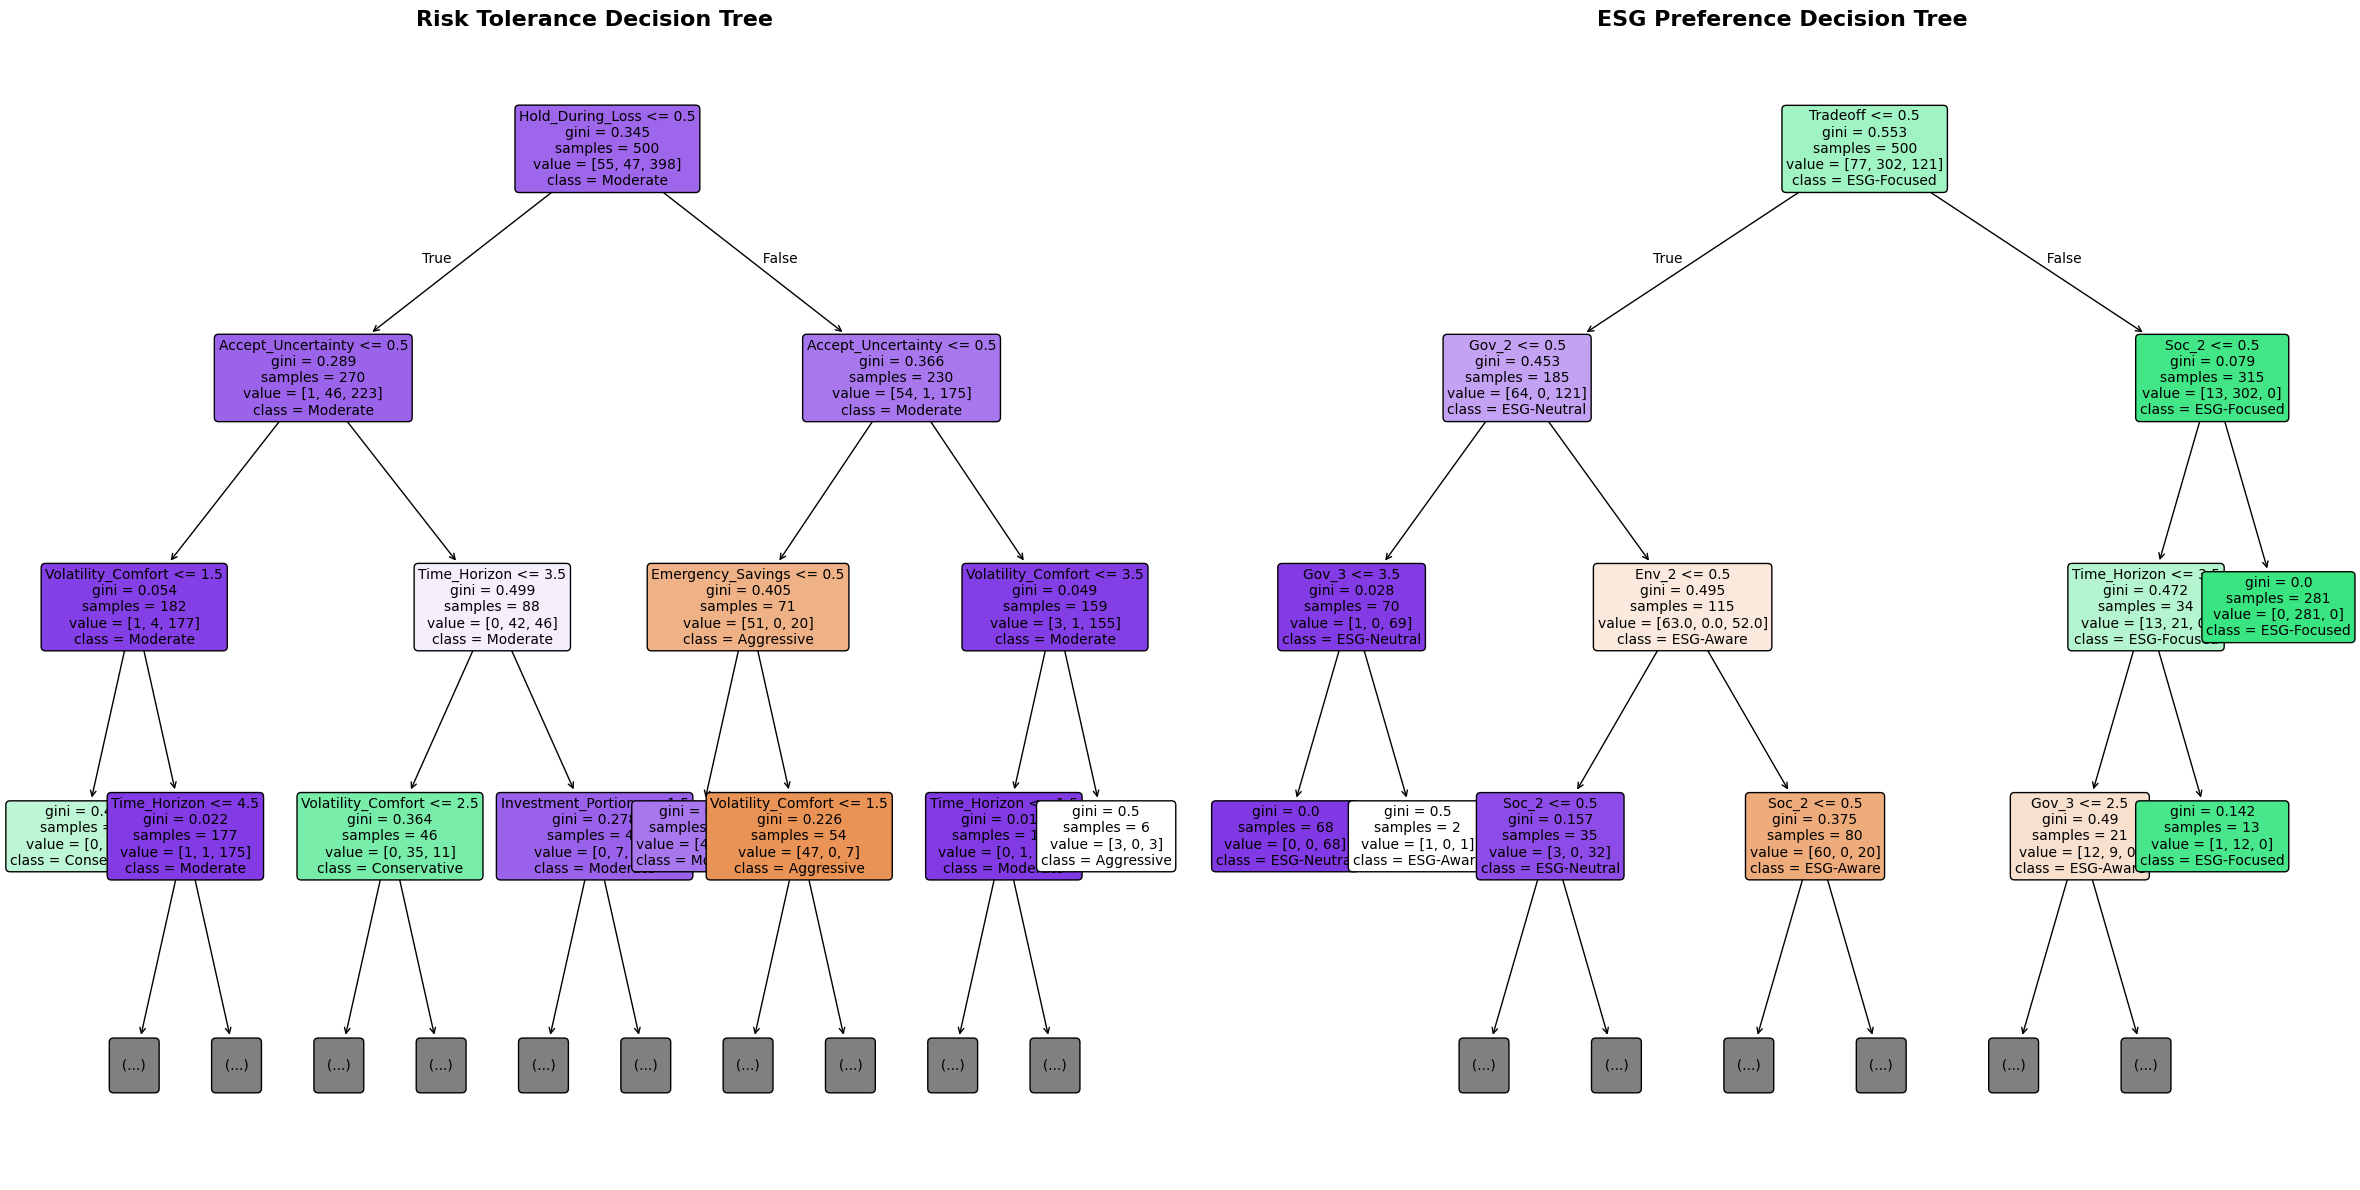

✅ Created matplotlib decision tree visualizations
Creating interactive Plotly tree visualizations...


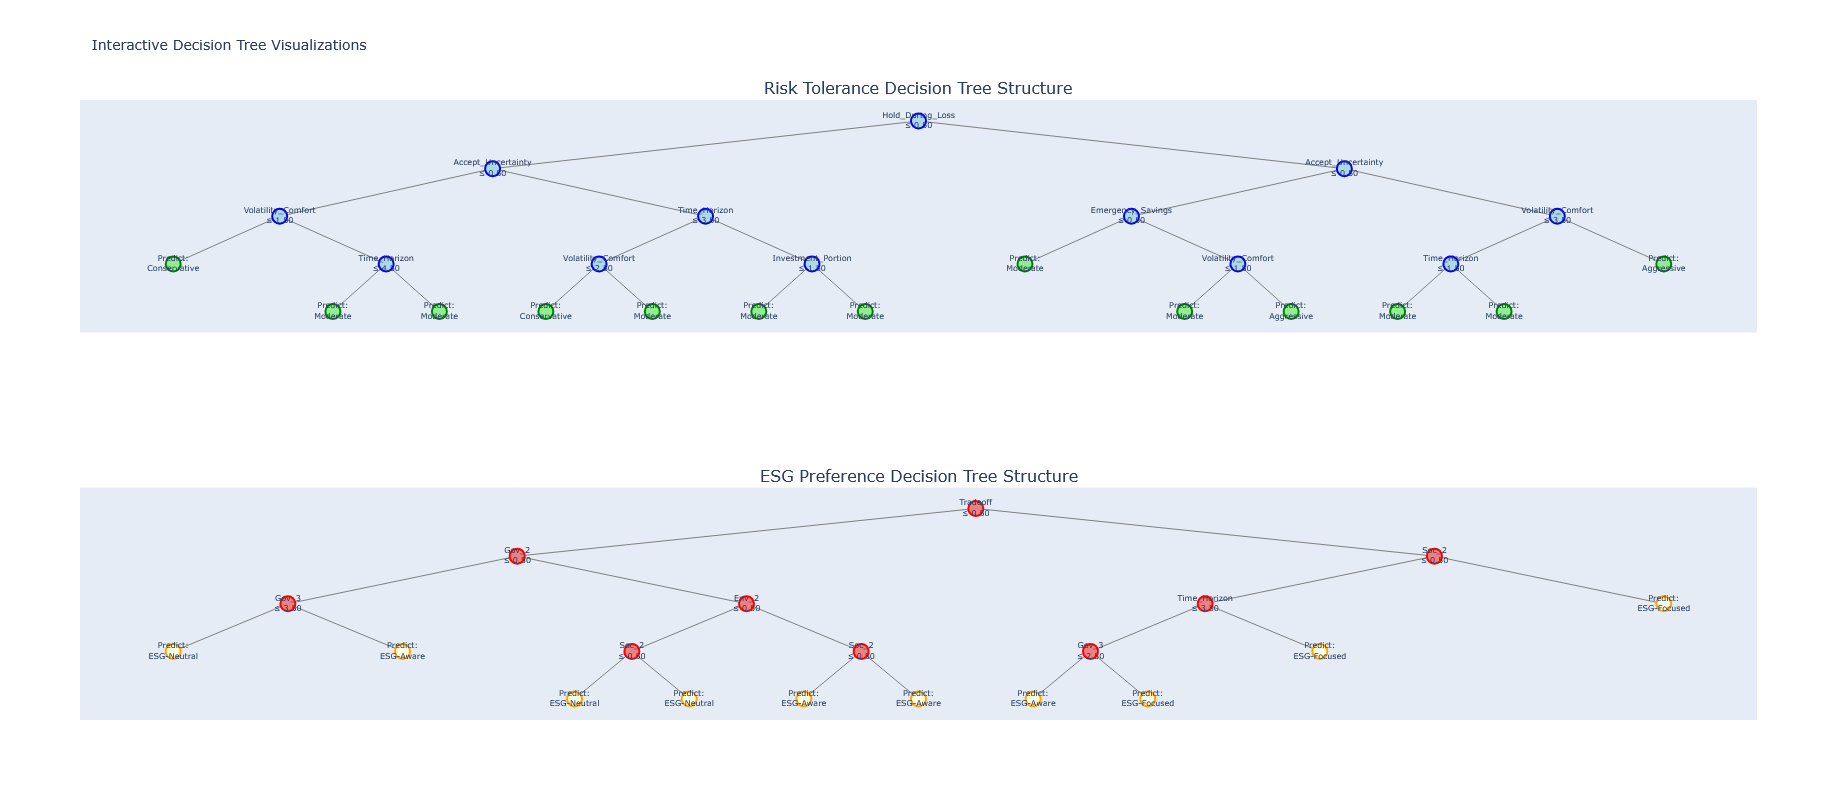

✅ Created interactive Plotly decision tree visualizations

 FORMATTED DECISION TREE RULES

 RISK TOLERANCE DECISION RULES:
-----------------------------------

Rule 1: → Moderate (Confidence: 100.0%, Samples: 1)
Conditions:
  • Hold During Loss > 0.50
  • Accept Uncertainty ≤ 0.50
  • Emergency Savings > 0.50
  • Volatility Comfort ≤ 1.50

Rule 2: → Moderate (Confidence: 100.0%, Samples: 1)
Conditions:
  • Hold During Loss > 0.50
  • Accept Uncertainty > 0.50
  • Volatility Comfort ≤ 3.50
  • Time Horizon > 1.50

Rule 3: → Moderate (Confidence: 99.4%, Samples: 1)
Conditions:
  • Hold During Loss ≤ 0.50
  • Accept Uncertainty ≤ 0.50
  • Volatility Comfort > 1.50
  • Time Horizon ≤ 4.50

Rule 4: → Moderate (Confidence: 93.8%, Samples: 1)
Conditions:
  • Hold During Loss ≤ 0.50
  • Accept Uncertainty ≤ 0.50
  • Volatility Comfort > 1.50
  • Time Horizon > 4.50

Rule 5: → Moderate (Confidence: 92.9%, Samples: 1)
Conditions:
  • Hold During Loss > 0.50
  • Accept Uncertainty > 0.50
  • Vola

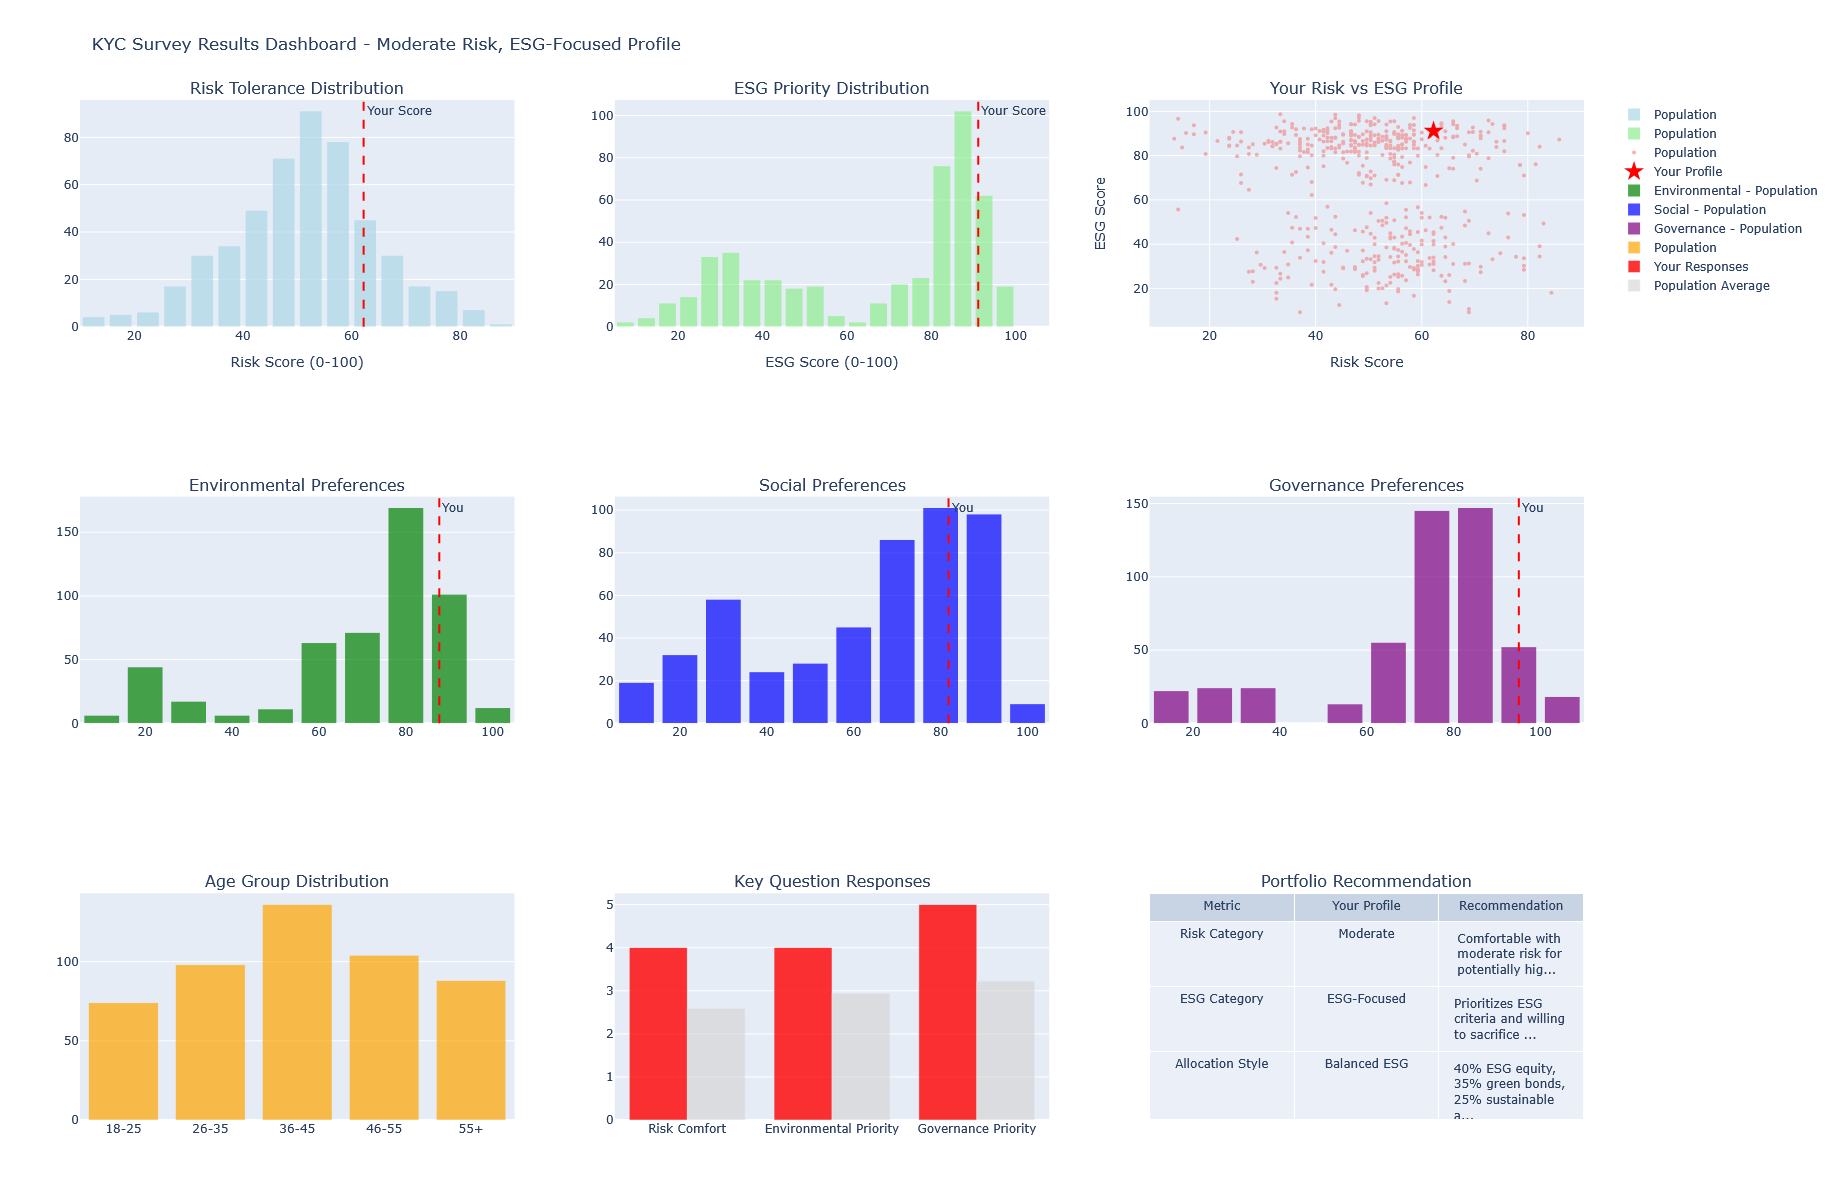

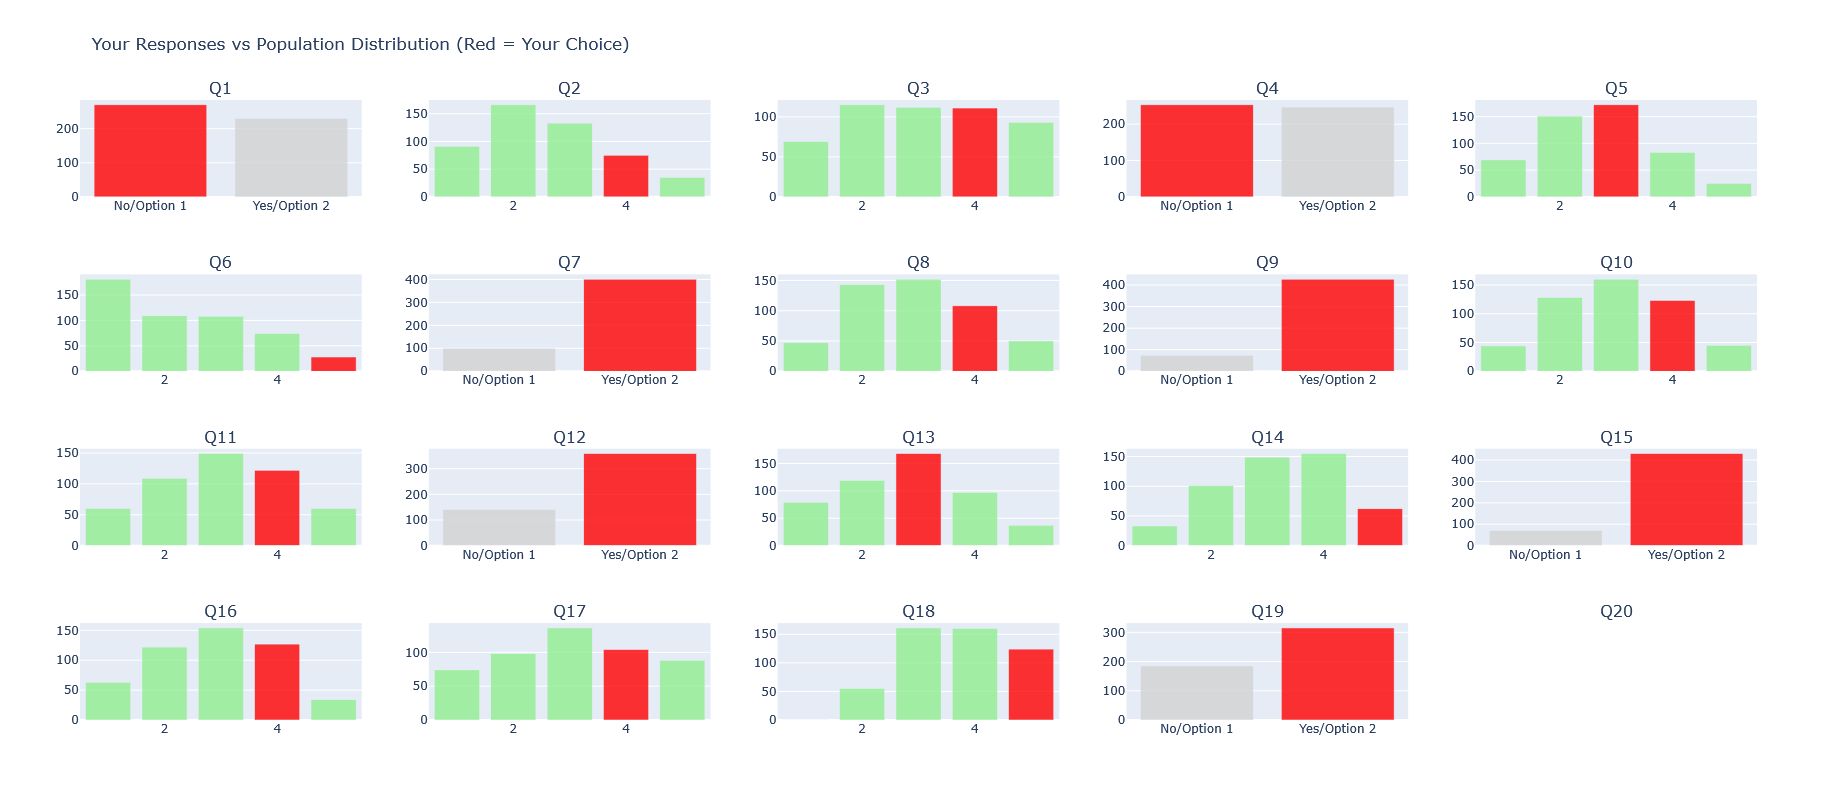


🏆 FINAL PORTFOLIO RECOMMENDATION
Portfolio Style: Balanced ESG
Allocation: 40% ESG equity, 35% green bonds, 25% sustainable alternatives
Key Focus: Diversified sustainable investing
Strategy: Balanced risk-return with strong ESG integration across asset classes


In [10]:
# =====================================
# EXECUTE DEMONSTRATION
# =====================================

print("KYC SURVEY & CLIENT PROFILING DEMONSTRATION")
print("AI-Integrated Sustainable Finance - Lecture 9")
print("Vitali Alexeev, UTS Business School")
print("=" * 60)

# Run the complete demonstration
results = run_kyc_demonstration()

In [11]:
# Show educational exercises
create_student_exercises()

print(f"\n DEMONSTRATION COMPLETE!")
print("=" * 30)


 STUDENT EXERCISES AND EXPERIMENTS
1. MODIFY RESPONSE EXPERIMENT:
   • Change risk tolerance answers and observe portfolio changes
   • Try extreme ESG preferences (all 1s vs all 5s)
   • See how age affects recommendations

2. POPULATION ANALYSIS:
   • Increase simulation size to 1000 clients
   • Analyze correlations between demographics and preferences
   • Study the distribution of different investor types

3. DECISION TREE OPTIMIZATION:
   • Adjust max_depth parameter and observe complexity changes
   • Try different splitting criteria
   • Compare accuracy of simple vs complex trees

4. CUSTOM SCORING:
   • Modify the scoring weights for different questions
   • Add new questions to the survey
   • Create industry-specific ESG categories

5. ROBO-ADVISOR ENHANCEMENT:
   • Add real-time market data integration
   • Include behavioral biases detection
   • Create dynamic rebalancing triggers

 DEMONSTRATION COMPLETE!


In [12]:
print("Students can now:")
print("• Analyze their personal investment profile")  
print("• Compare responses with simulated population")
print("• Understand decision tree classification logic")
print("• Experiment with different response patterns")
print("• See real-time portfolio recommendations")

print(f"\n REAL-WORLD APPLICATION:")
print("This KYC system could be deployed as:")
print("• Web-based robo-advisor onboarding")
print("• Mobile app for investment profiling")  
print("• Bank customer assessment tool")
print("• Financial advisor decision support system")

# Return results for further experimentation
print(f"\n Access results dictionary for:")
print("• results['user_scores'] - Your calculated scores")
print("• results['simulated_data'] - Population data")
print("• results['decision_trees'] - Trained models")
print("• results['dashboards'] - Interactive visualizations")
    
# Example of how to modify responses and reanalyze:
# new_responses = results['user_responses'].copy()
# new_responses['risk_2'] = 1  # Change risk comfort to very low
# new_responses['esg_env_1'] = 5  # Change environmental importance to maximum
# modified_results = modify_responses_and_reanalyze(results, new_responses)

Students can now:
• Analyze their personal investment profile
• Compare responses with simulated population
• Understand decision tree classification logic
• Experiment with different response patterns
• See real-time portfolio recommendations

 REAL-WORLD APPLICATION:
This KYC system could be deployed as:
• Web-based robo-advisor onboarding
• Mobile app for investment profiling
• Bank customer assessment tool
• Financial advisor decision support system

 Access results dictionary for:
• results['user_scores'] - Your calculated scores
• results['simulated_data'] - Population data
• results['decision_trees'] - Trained models
• results['dashboards'] - Interactive visualizations
